# Yearly Global Average CO2 Concentrations in parts per million (ppm) and Linear Regression

AIM: To practice Linear Regression using Python code.
DATA: The dataset includes monthly mean carbon dioxide globally averaged over marine surface sites for the span 1980-2020. 

Data Source: National Oceanic and Atmospheric Administration (NOAA)
https://gml.noaa.gov/ccgg/trends/global.html




In [22]:
#Import necessary librarires of Python

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn import metrics
import math
import sklearn
import statistics

In [23]:
#Read the Dataset
df=pd.read_csv('global-atm-co2.csv')

#Know the basics of the dataset
print (df.head(10))       # display first 10 entries
print(df.shape)           # display the dimensions of the dataset (rows and columns)
print(df.columns.values)  #display columns names
df.info()                 # display data types and memory usage

   year  average_co2_concentrations
0  1980                  338.911667
1  1981                  340.105000
2  1982                  340.856667
3  1983                  342.530833
4  1984                  344.074167
5  1985                  345.544167
6  1986                  346.965833
7  1987                  348.674167
8  1988                  351.159167
9  1989                  352.782500
(45, 2)
['year' 'average_co2_concentrations']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   year                        45 non-null     int64  
 1   average_co2_concentrations  45 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 852.0 bytes


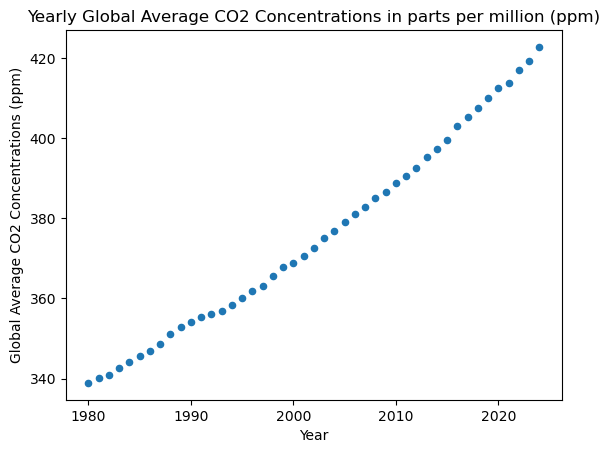

In [24]:
#Scatter plot : Plot the scatter plot of yearly average_co2_concentrations variable 

df.plot.scatter(x="year",y="average_co2_concentrations")
plt.xlabel('Year') 
plt.ylabel('Global Average CO2 Concentrations (ppm)') 
plt.title ('Yearly Global Average CO2 Concentrations in parts per million (ppm)')
plt.show()

## Linear Regression
Let us try to fit a Line to the data. 
Equation of a line is y = b0 + b1*x, where b0 is Y-intercept and b1 is the slope.

In [25]:
# Use NumPy library to convert the DataFrame to NumPy Array which would be used in the further steps. 
x=[]
y=[]
x=df['year'].to_numpy()
y=df['average_co2_concentrations'].to_numpy()
n = np.size(x)  # number of observations/points 

Estimated coefficients of the line y = b0 + b1*x are:
b0 = -3391.2151751647543   
b1 = 1.8815660955612603
RMSE VALUE is 2.498042944224692
Normalized RMSE VALUE is 0.0066493876680294335


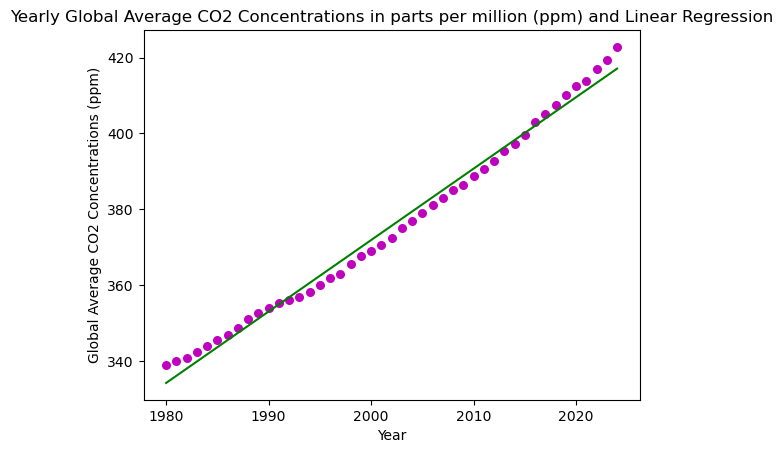

In [26]:
 # Function: Calculate Regression Coefficients : b0 is Y-intercept and b1 is slope for a Regression Line b0 + b1*x  
def estimate_coef(x, y): 
     
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
   
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  
# Function: Plot the scatter plot and Regression Line as per the predicted coefficients
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
      
    # plot the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # prepare and render the scatter plot 
    plt.xlabel('Year') 
    plt.ylabel('Global Average CO2 Concentrations (ppm)') 
    plt.title ('Yearly Global Average CO2 Concentrations in parts per million (ppm) and Linear Regression')     
    plt.show() 

# Function: Calculate RMSE (Root Mean-Squared Error values)    
def rmse(b,y):
    predict=[]
    for i in range(0,n):
        predict.append(b[0]+b[1]*x[i])
    predict=np.array(predict)    
    mse = sklearn.metrics.mean_squared_error(y, predict)
    root_mse = math.sqrt(mse)                       # RMSE value
    nrmse = root_mse/statistics.mean(y)             # Normalized RMSE value
    return(root_mse,nrmse)

# Function: Call the functions in a particular order
def main(x,y): 
    # Estimate Regression Coefficients 
    b = estimate_coef(x, y) 
    print("Estimated coefficients of the line y = b0 + b1*x are:\nb0 = {}   \nb1 = {}".format(b[0], b[1])) 
      
    # Plot regression line 
    residual_error = rmse(b,y)
    print("RMSE VALUE is",residual_error[0])
    print("Normalized RMSE VALUE is",residual_error[1])
    plot_regression_line(x, y, b)

#Call the main function    
if __name__ == "__main__": 
         main(x,y)



Root Mean Square Error,RMSE, is the standard deviation of the residuals (prediction errors).
Residuals are a measure of how far from the regression line data points are.
RMSE is a measure of how spread out these residuals are. It tells us how concentrated the data is around the line of best fit.